# GCN Dataset

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data

/home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


## Node Dataset

In [3]:
# 노드 개수 & 엣지 개수
N = 6  # 노드 개수
E = 7  # 엣지 개수

# 노드 특성 (GNN과 GCN 동일)
x = torch.randn(N, 3)  # (N, F) 형태의 랜덤 노드 특성
x

tensor([[ 0.2738,  1.1313, -1.6594],
        [-0.3472, -0.6228,  1.0952],
        [-0.3139,  0.2077,  0.2654],
        [-0.4621,  0.2194, -0.7714],
        [-1.0669, -0.9972, -1.5976],
        [ 0.8158,  1.2449, -0.1931]])

In [4]:
# 엣지 리스트 (GNN과 GCN 동일)
edge_index = torch.tensor([[0, 1, 2, 3, 4, 5, 1], 
                           [1, 2, 3, 4, 5, 0, 4]], dtype=torch.long)  # (2, E)
edge_index

tensor([[0, 1, 2, 3, 4, 5, 1],
        [1, 2, 3, 4, 5, 0, 4]])

In [6]:
# GNN용 데이터
gnn_data = Data(x=x, edge_index=edge_index)
gnn_data.x

tensor([[ 0.2738,  1.1313, -1.6594],
        [-0.3472, -0.6228,  1.0952],
        [-0.3139,  0.2077,  0.2654],
        [-0.4621,  0.2194, -0.7714],
        [-1.0669, -0.9972, -1.5976],
        [ 0.8158,  1.2449, -0.1931]])

In [8]:
gnn_data.edge_index

tensor([[0, 1, 2, 3, 4, 5, 1],
        [1, 2, 3, 4, 5, 0, 4]])

## Graph Dataset

In [1]:
from torch_geometric.utils import add_self_loops, degree

# Self-loop 추가
edge_index_gcn, _ = add_self_loops(edge_index, num_nodes=N)

# Degree 계산 및 정규화
deg = degree(edge_index_gcn[0], N, dtype=torch.float)
deg_inv_sqrt = deg.pow(-0.5)
deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

# 노드별 정규화 계수
norm = deg_inv_sqrt[edge_index_gcn[0]] * deg_inv_sqrt[edge_index_gcn[1]]

# GCN용 데이터
gcn_data = Data(x=x, edge_index=edge_index_gcn)

/home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /home/kubwa/anaconda3/envs/gnn/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


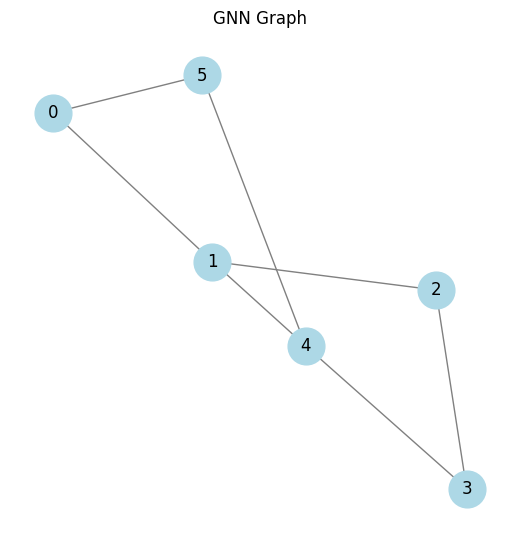

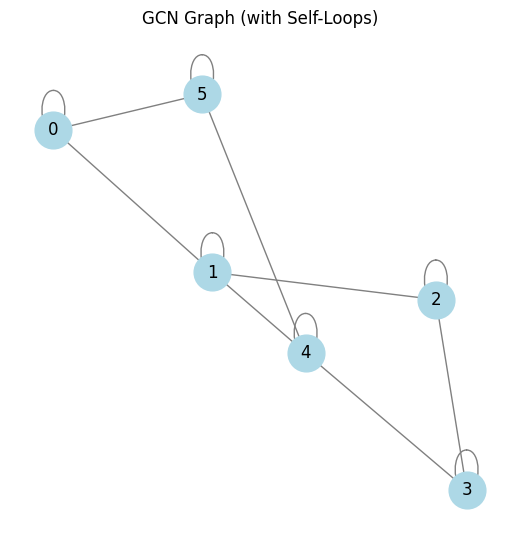

In [1]:
# 그래프 시각화 함수
def plot_graph(data, title, pos=None):
    G = nx.Graph()
    edge_list = data.edge_index.numpy().T.tolist()
    G.add_edges_from(edge_list)

    if pos is None:
        pos = nx.spring_layout(G)  # 노드 배치

    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=12)
    plt.title(title)
    return pos


# 시각화 수행
pos = plot_graph(gnn_data, "GNN Graph")
plot_graph(gcn_data, "GCN Graph (with Self-Loops)", pos)

plt.show()